# COMPUTER ASSIGNMENT 1


- In class we learned about different color representations. 
- **HSL** (Hue, Saturation, Lightness) and **HSV** (Hue, Saturation, Value) are two alternative representations of the RGB color model. Hue represents dominant color as perceived by an observer and can be used for simple color detection. Take the following steps:
 1. **[ TODO 1 ]** Load the a color image of your choice (if you wish you can choose an image from the sample images provided at the course website as a colored image. You can refer to _Example4.py_ for loading a colored image.
 - **[ TODO 2 ]** Use **cv2.cvtColor()** function to convert the BGR image to HSV. As an input to this function you should use **cv2.COLOR_BGR2HSV**.
 - **[ TODO 3 ] Use **cv2.inRange()** function to find the pixels in the HSV image that their values are in the range of blue color. Your result should be a binary mask. ** The lower and upper limits for the blue color are _[110,50,50]_ and _[130,255,255]_, respectively. 
 - **[ TODO 4 ]** Use **cv2.bitwise_and()** function to create an image containing only the blue parts.
 - **[ TODO 5 ]** Display the original image and the mask and the detected blue parts. Furthermore, save the resulting images.  For displaying and saving images you can refer to Example4.py

Your results should look like the following. 
![](./Figures/Figure_1.png)

## PART 1


- Write the code to load the image here
- Code for color conversion

In [39]:
# Dependency
%matplotlib inline

import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# TODO - 1
# Load images

image_original = cv2.imread('Fruit.jpg', 1)

# color conversion
image_original_RBG = cv2.cvtColor(image_original,cv2.COLOR_BGR2RGB)
image_original_HSV = cv2.cvtColor(image_original,cv2.COLOR_BGR2HSV)

- Print the size of the image loaded 

image has size 321x377


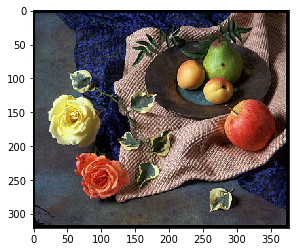

In [40]:
plt.figure(1)
plt.imshow(image_original_RBG)
print('image has size {0}x{1}'.format(image_original.shape[0], image_original.shape[1]))

- Code for finding the HUE for color **BLUE**
- CODE FOR IMAGE MANIPULATION(Use the bitwise and to extract certain features)
- CODE to **display results** 

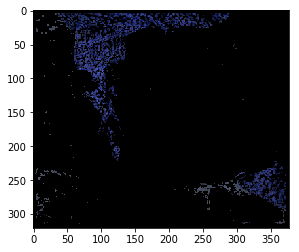

In [42]:
# TODO - 3
image_mask = cv2.inRange(image_original_HSV,np.array([110,50,50]),np.array([130,255,255]))
image_result_BGR = cv2.bitwise_and(image_original,image_original, mask= image_mask)
image_result_RGB = cv2.cvtColor(image_result_BGR,cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(image_result_RGB)

- CODE to **save resulting images ** 

In [45]:
# TODO - 5
# writing by default takes BGR image
cv2.imwrite('Fruit_masked.png',image_result_BGR)

True

## PART 2

### Histogram Operations
- In this exercise we will explore the histogram equalization of gray-scale images. 
   
 - You can also find useful sample codes in the following link from OpenCV tutorials- [TUTORIALS](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html )

- Take the following steps:
 1. **[ TODO 6 ]** Load the **wiki.jpg** image from sample images as a gray-scale image using **cv2.imread()** function. Note: set the second argument of cv2.imread() function to **zero** for gray-scale.
 - **[ TODO 7 ]** Calculate the histogram of the image. **numpy.histogram()** function can be used for calculation of the histogram. Refer to following link for more information:[HISTOGRAMS](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html) 
 - **[ TODO 8 ]** Calculate the cdf using the **np.cumsum()** function and proper normalization.
 - **[ TODO 9 ]** Compute and apply the histogram equalizing function using the algorithm described in class.
 - **[ TODO 10 ]** Display the results.
 
Expected Output:
![](./Figures/Figure_2.png)


- Code to read the image

In [94]:
# TODO - 6
image_wiki = cv2.imread('wiki.jpg', 0)
print(image_wiki)

[[148 145 147 ... 165 169 167]
 [149 150 132 ... 147 141 139]
 [143 143 135 ... 138 143 142]
 ...
 [139 132 135 ... 146 143 144]
 [138 132 135 ... 144 146 146]
 [136 131 134 ... 145 146 146]]


- Find the Histogram

In [95]:
# TODO - 7
his_wiki = cv2.calcHist([image_wiki],[0], None, [256], [0, 256])

- Calculate the CDF
- Apply Histogram Equilization

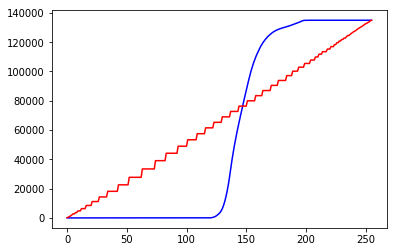

In [96]:
# TODO - 8
cdf_wiki = his_wiki.cumsum()
k_factor = (np.amax(cdf_wiki) - np.amin(cdf_wiki))/255

plt.plot(cdf_wiki, color = 'b')

cdf_normalized = np.rint (cdf_wiki/k_factor)
cdf_map = np.vectorize(lambda x: cdf_normalized[x])
image_wiki = cdf_map(image_wiki)

his_wiki_adjusted = cv2.calcHist([image_wiki],[0], None, [256], [0, 256])
cdf_wiki_adjusted = his_wiki_adjusted.cumsum()

plt.plot(cdf_wiki_adjusted, color = 'r')

- **Display results** and **save image**

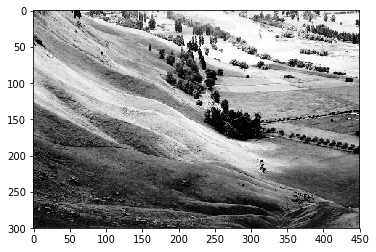

In [108]:
# TODO - 10
image_wiki_BGR = cv2.cvtColor(image_wiki/255, cv2.COLOR_GRAY2RGB)
cv2.imwrite('wiki_wq.png',image_wiki_BGR*255)
plt.imshow(image_wiki_BGR)

## Submission Instructions

- Please submit two files in NYUclasses as two separate attachment:
 - A pdf version of the notebbok (that includes the results/figures and comments you have for any results)
 - A zip file including all following files named **your-netid-CA01**
     - The python notebook as a _.ipynb_ file with the name as **your-netid-CA01**
     - The pdf version of the notebbok 
     - Add all the saved images in a folder named _output-images_
 